In [ ]:
import pylab
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import requests
import io
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (10., 8.)

In [ ]:
#@title
url = "https://raw.githubusercontent.com/CalypsoC/QM2-PROJECT9/main/Total/FINAL-1.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))
df.head() #check the first five rows

,STATE,Median Household Income,Completing college,Completing High school,Abortion strictness,Political affiliation 2021,Median Age by State,High religiosity index %,Attendance at religious services\nAt least once a week %
0,Alabama,53913,26.2,30.3,7,-29.59438,39.2,77,51
1,Alaska,77845,30.0,28.4,3,-14.62028,34.6,45,30
2,Arizona,69056,30.3,23.8,6,-7.58754,37.9,53,34
3,Arkansas,52528,23.8,33.9,7,-31.83641,38.3,70,41
4,California,84907,34.7,20.4,2,25.45492,36.7,49,31


In [ ]:
strictness = df['Abortion strictness']
politics  =   df['Political  affiliation 2021']
income = df['Median Household Income\xa0']
age = df['Median Age by State']
college = df['Completing college\xa0']
high_school = df['Completing High school\xa0']
religiousness=df['Attendance at religious services\nAt least once a week %']


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                            
Dep. Variable:     Abortion strictness   R-squared:                       0.423
Model:                             OLS   Adj. R-squared:                  0.412
Method:                  Least Squares   F-statistic:                     35.98
Date:                 Wed, 21 Dec 2022   Prob (F-statistic):           2.35e-07
Time:                         02:35:35   Log-Likelihood:                -84.189
No. Observations:                   51   AIC:                             172.4
Df Residuals:                       49   BIC:                             176.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const   

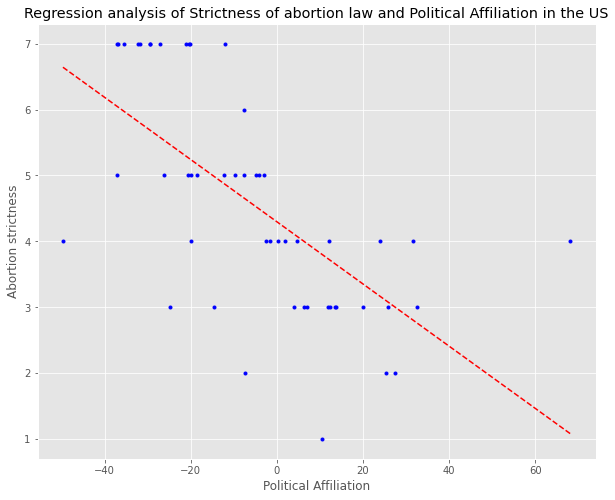

In [ ]:
# SIMPLE REGRESSION FUNCTION


def simple_regression(x_values,y_values,title,x_label,y_label,save_fig):
    from sklearn.linear_model import LinearRegression
    import statsmodels.api as sm
    # These lines extract the y-values and the x-values from the data:
    

    # regression procedure:
    X_values = sm.add_constant(x_values)
    regression_model_a = sm.OLS(y_values, X_values)
    regression_model_b = regression_model_a.fit()
    # and print a summary of the results:
    print(regression_model_b.summary())
    print() # blank line

    #Values we look for
    gradient  = regression_model_b.params[1]
    intercept = regression_model_b.params[0]
    Rsquared  = regression_model_b.rsquared
    MSE       = regression_model_b.mse_resid
    pvalue    = regression_model_b.f_pvalue

    # And print them:
    print("gradient  =", regression_model_b.params[1])
    print("intercept =", regression_model_b.params[0])
    print("Rsquared  =", regression_model_b.rsquared)
    print("MSE       =", regression_model_b.mse_resid)
    print("pvalue    =", regression_model_b.f_pvalue)

    # This line creates the endpoints of the best-fit line:
    x_lobf = [min(x_values),max(x_values)]
    y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

    # Uncomment these lines (remove the #) to set the axis limits (otherwise they will be set automatically):
    #x_min,x_max = 0,5000000
    #y_min,y_max = 0,5000000
    #plt.xlim([x_min,x_max])
    #plt.ylim([y_min,y_max])

    # The next lines create and save the plot:
    plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig(save_fig) #the filename you wish to save as:


#An example of how to call this function
  
simple_regression(x_values = politics,y_values = strictness, title ='''Regression analysis of Strictness of abortion law and Political Affiliation in the US''',x_label='Political Affiliation',y_label ='Abortion strictness', save_fig ="Political affiliation.png")


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                            
Dep. Variable:     Abortion strictness   R-squared:                       0.381
Model:                             OLS   Adj. R-squared:                  0.368
Method:                  Least Squares   F-statistic:                     30.17
Date:                 Wed, 21 Dec 2022   Prob (F-statistic):           1.40e-06
Time:                         02:35:39   Log-Likelihood:                -85.995
No. Observations:                   51   AIC:                             176.0
Df Residuals:                       49   BIC:                             179.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

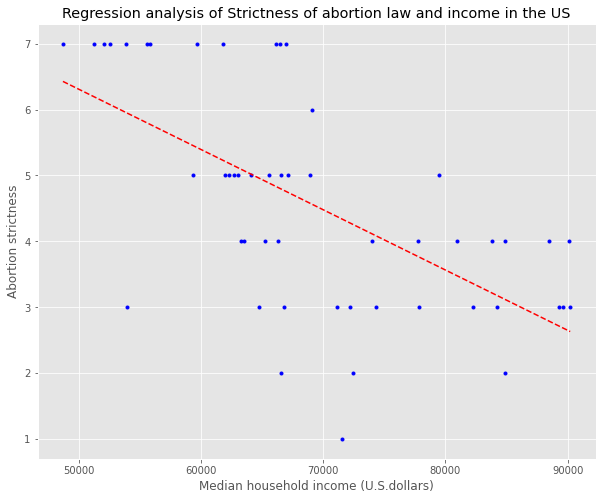

In [ ]:
simple_regression(x_values = income ,y_values = strictness, title ='''Regression analysis of Strictness of abortion law and income in the US''',x_label='Median household income (U.S.dollars)',y_label ='Abortion strictness', save_fig ="Income.png")

In [ ]:
#@title
# TABLE FUNCTION 
def table(gradient_value,intercept_value,R_squared_value,MSE_value,p_value):
    from prettytable import PrettyTable
    # Specify the Column Names while initializing the Table
    myTable = PrettyTable(["gradient", "intercept", "R-squared", "MSE", "p-value"])
    # Add rows
    myTable.add_row([gradient_value,intercept_value,R_squared_value,MSE_value,p_value])
    print(myTable)
#An example of how to call this function
table("-0.04716631016096847", "4.296771051941288", "0.42341751647837567", "1.6547617334202043","2.3518708938858638e-07")

+----------------------+-------------------+---------------------+--------------------+------------------------+
|       gradient       |     intercept     |      R-squared      |        MSE         |        p-value         |
+----------------------+-------------------+---------------------+--------------------+------------------------+
| -0.04716631016096847 | 4.296771051941288 | 0.42341751647837567 | 1.6547617334202043 | 2.3518708938858638e-07 |
+----------------------+-------------------+---------------------+--------------------+------------------------+


In [ ]:
#@title
#SUMMARY STATISTICS ABORTION STRICTNESS FUNCTION
def summary_Stats(value):
    import numpy as np 
    mean = np.mean(value)
    median = np.median(value) 
    std = np.std(value)
    var = np.var(value)
    min = np.min(value)
    max = np.max(value) 
    range = np.max(value) - np.min(value)
    print('Range is', range)

    # First quartile (Q1)
    Q1 = np.median(strictness[:25])
    print('First quartile is ', Q1)
      
    # Third quartile (Q3)
    Q3 = np.median(strictness[25:])
    print('Third quartile is ', Q3)
      
    # Interquartile range (IQR)
    IQR = Q3 - Q1
      
    print('Interquartile range is ', IQR)

    # TABLE
    from prettytable import PrettyTable
    # Specify the Column Names while initializing the Table
    myTable = PrettyTable(["Mean", "Median", "SD", "Variance", "Min","Max","Range","Q1","Q3", "IQR" ])
    # Add rows
    myTable.add_row([mean,median,std,var,min,max,range,Q1,Q3,IQR ])
    print(myTable)

summary_Stats(strictness)

Range is 6
First quartile is  4.0
Third quartile is  4.5
Interquartile range is  0.5
+-------------------+--------+--------------------+-------------------+-----+-----+-------+-----+-----+-----+
|        Mean       | Median |         SD         |      Variance     | Min | Max | Range |  Q1 |  Q3 | IQR |
+-------------------+--------+--------------------+-------------------+-----+-----+-------+-----+-----+-----+
| 4.549019607843137 |  4.0   | 1.6605423811560887 | 2.757400999615533 |  1  |  7  |   6   | 4.0 | 4.5 | 0.5 |
+-------------------+--------+--------------------+-------------------+-----+-----+-------+-----+-----+-----+


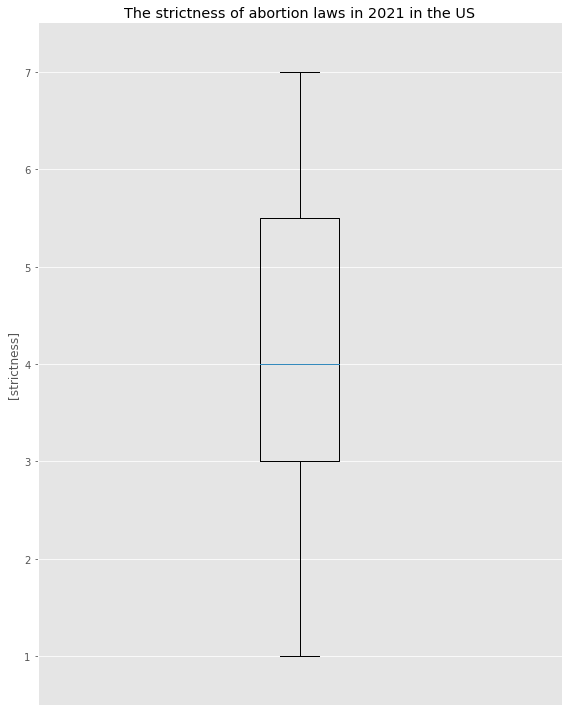

In [ ]:
#@title
#BOXPLOT FUNCTION
# You can ignore these two lines:
def boxplot(value,title,ylabel,axis_max,axis_min):
    import matplotlib.pyplot as plt
    import numpy as np

    #data = np.array(value)
    data = value

    # Use the next line to set figure height and width (experiment to check the scale):
    figure_width, figure_height = 8,10

    # This line creates the figure. 
    fig = plt.figure(figsize=(figure_width,figure_height))
   
    # Uncomment the next three lines to set the axis limits:
    plt.ylim([axis_min,axis_max])

    # These lines give the plot a title and an axis label:
    plt.title(title)
    plt.ylabel(ylabel)

    # The next lines create the plot and generally make it visually attractive:
    plt.xlim([0.5,1.5])
    # This is the line that actually produces the boxplot
    plt.boxplot(data, vert = True)
    plt.xticks([])
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    plt.tight_layout()

    

boxplot(strictness,"The strictness of abortion laws in 2021 in the US","[strictness]",7.5,0.5)

Here is an example of how everything works:(skip this step, it contains error and the regression of politcial affliation has been done in the model already)

                             OLS Regression Results                            
Dep. Variable:     Abortion strictness   R-squared:                       0.372
Model:                             OLS   Adj. R-squared:                  0.359
Method:                  Least Squares   F-statistic:                     28.97
Date:                 Wed, 21 Dec 2022   Prob (F-statistic):           2.06e-06
Time:                         02:38:17   Log-Likelihood:                -86.386
No. Observations:                   51   AIC:                             176.8
Df Residuals:                       49   BIC:                             180.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


NameError: ignored

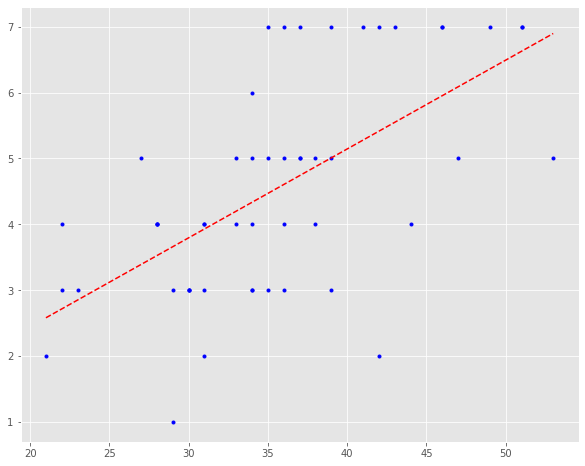

In [ ]:
#@title
#POLITICAL AFFILIATION(an example of how everything works)


#typo, remember there are 2 spaces between Political and affiliation!

#REGRESSION

    
    
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
    # These lines extract the y-values and the x-values from the data:
    

    # regression procedure:
X_values = sm.add_constant(x_values)
regression_model_a = sm.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
    # and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

    #Values we look for
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

    # And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

    # This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

    # Uncomment these lines (remove the #) to set the axis limits (otherwise they will be set automatically):
    #x_min,x_max = 0,5000000
    #y_min,y_max = 0,5000000
    #plt.xlim([x_min,x_max])
    #plt.ylim([y_min,y_max])

    # The next lines create and save the plot:
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.title(title)
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.savefig(save_fig)

In [ ]:
#@title
# TABLE
from prettytable import PrettyTable
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["gradient", "intercept", "R-squared", "MSE", "p-value"])
# Add rows
myTable.add_row(["-0.05", "4.3", "0.42", "1.65","2.35e-07"])
print(myTable)

+----------+-----------+-----------+------+----------+
| gradient | intercept | R-squared | MSE  | p-value  |
+----------+-----------+-----------+------+----------+
|  -0.05   |    4.3    |    0.42   | 1.65 | 2.35e-07 |
+----------+-----------+-----------+------+----------+


It is also important to notice that the political affiliation data is right scewed, meaning on average there is more states with eletorate of neutral to traditional views. 

Interpretation of regression statistics:

Regression statistics are presented in the Table X. Intercept,
the value of y when x = 0. Theoretically, it amounts to 4.3
abortion strictness when the political affiliation is 0, namely, neutral. This extrapolation
does seem reasonable and balanced. Abortion strictness is a little below the average (4.5), when political affiliation is neutral. Gradient of the regression line shows that a one unit increase in abortion strictness results in -0.04 units decrease inpolitical affiliation. It is a very weak negative
correlation. R2 is the proportion of the variation in y-variable
that can be explained by the x-variable. In this case 42% of
the variation in abortion strictness can be
explained by the variation in the political affiliation. P-value indicates that a probability that a negative linear regression as the
one we have found could arise by change is 2.35 x 10-7, which
means that the relationship can be considered as real.

Real world implications: 

In [ ]:
#@title
#SUMMARY STATISTICS ABORTION STRICTNESS

print(np.mean(strictness)) 
print(np.median(strictness)) 
print(np.std(strictness))
print(np.var(strictness))
min = print(np.min(strictness))
max =print(np.max(strictness)) 

min = 1
max = 7
range = max - min
print('Range is', range)

# First quartile (Q1)
Q1 = np.median(strictness[:25])
print(Q1)
  
# Third quartile (Q3)
Q3 = np.median(strictness[25:])
print(Q3)
  
# Interquartile range (IQR)
IQR = Q3 - Q1
  
print(IQR)

# TABLE
from prettytable import PrettyTable
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Mean", "Median", "SD", "Variance", "Min","Max","Range","Q1","Q3", "IQR" ])
# Add rows
myTable.add_row(["4.55", "4.0", "1.66", "2.76","1.0","7.0","6.0","4.0", "4.5", "0.5" ])
print(myTable)


4.549019607843137
4.0
1.6605423811560887
2.757400999615533
1
7
Range is 6
4.0
4.5
0.5
+------+--------+------+----------+-----+-----+-------+-----+-----+-----+
| Mean | Median |  SD  | Variance | Min | Max | Range |  Q1 |  Q3 | IQR |
+------+--------+------+----------+-----+-----+-------+-----+-----+-----+
| 4.55 |  4.0   | 1.66 |   2.76   | 1.0 | 7.0 |  6.0  | 4.0 | 4.5 | 0.5 |
+------+--------+------+----------+-----+-----+-------+-----+-----+-----+


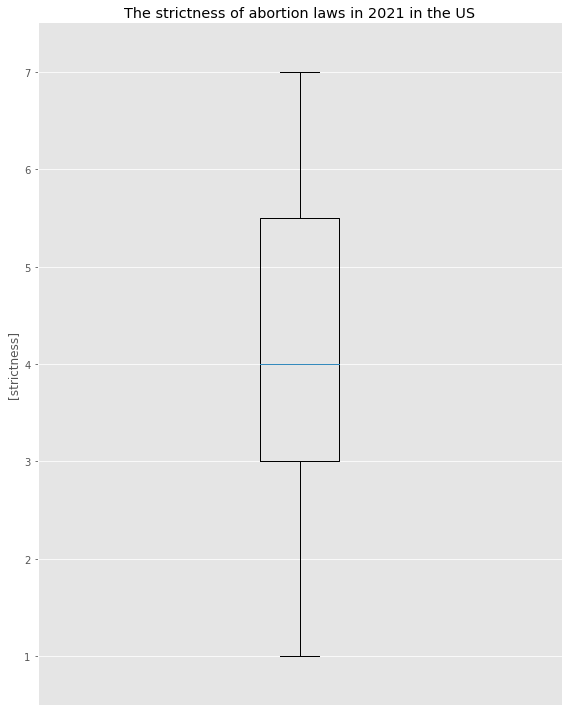

In [ ]:
#@title
#BOXPLOT ABORTION STRICTNESS
# You can ignore these two lines:
import matplotlib.pyplot as plt
import numpy as np

data = np.array(strictness)

# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 8,10

# This line creates the figure. 
fig = plt.figure(figsize=(figure_width,figure_height))

# Uncomment the next three lines to set the axis limits (otherwise they will be set automatically):
axis_min = 0.5
axis_max = 7.5
plt.ylim([axis_min,axis_max])

# These lines give the plot a title and an axis label:
plt.title("The strictness of abortion laws in 2021 in the US")
plt.ylabel("[strictness]")

# The next lines create the plot and generally make it visually attractive:
plt.xlim([0.5,1.5])
# This is the line that actually produces the boxplot
plt.boxplot(data, vert = True)
plt.xticks([])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()

In [ ]:
#@title
#SUMMARY STATISTICS POLITICAL AFFILIATION
import numpy as np 
print(np.mean(politics)) 
print(np.median(politics)) 
print(np.std(politics))
print(np.var(politics))
min = print(np.min(politics))
max =print(np.max(politics))

min = -49.73126
max = 68.15865
range = max - min
print('Range is', range)

# First quartile (Q1)
Q1 = np.median(politics[:25])
print(Q1)
  
# Third quartile (Q3)
Q3 = np.median(politics[25:])
print(Q3)
  
# Interquartile range (IQR)
IQR = Q3 - Q1
  
print(IQR)

# TABLE
from prettytable import PrettyTable
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Mean", "Median", "SD", "Variance", "Min","Max","Range","Q1","Q3", "IQR" ])
# Add rows
myTable.add_row(["-5.348066343137255", "-7.432655", "22.90880692685558", "524.813434811946","-49.73126","68.15865","117.88990999999999","-7.432655", "-8.394117000000001", "-0.9614620000000018" ])
print(myTable)

-5.348066343137255
-7.432655
22.90880692685558
524.8134348119462
-49.73126
68.15865
Range is 117.88990999999999
-7.432655
-8.394117000000001
-0.9614620000000018
+--------------------+-----------+-------------------+------------------+-----------+----------+--------------------+-----------+--------------------+---------------------+
|        Mean        |   Median  |         SD        |     Variance     |    Min    |   Max    |       Range        |     Q1    |         Q3         |         IQR         |
+--------------------+-----------+-------------------+------------------+-----------+----------+--------------------+-----------+--------------------+---------------------+
| -5.348066343137255 | -7.432655 | 22.90880692685558 | 524.813434811946 | -49.73126 | 68.15865 | 117.88990999999999 | -7.432655 | -8.394117000000001 | -0.9614620000000018 |
+--------------------+-----------+-------------------+------------------+-----------+----------+--------------------+-----------+------------------

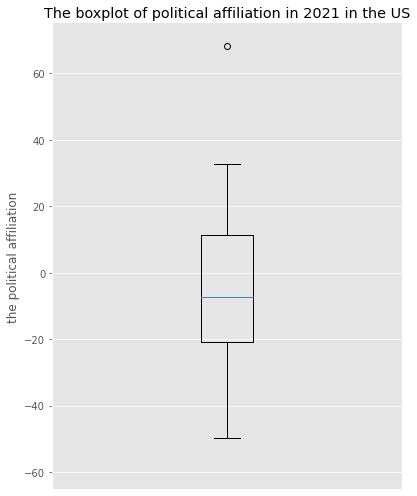

In [ ]:
#@title
#BOXPLOT POLITICAL AFFILIATION
# You can ignore these two lines:
import matplotlib.pyplot as plt
import numpy as np

data = np.array(politics)

# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 6,7

# This line creates the figure. 
fig = plt.figure(figsize=(figure_width,figure_height))

# Uncomment the next three lines to set the axis limits (otherwise they will be set automatically):
axis_min = -65
axis_max = 75
plt.ylim([axis_min,axis_max])

# These lines give the plot a title and an axis label:
plt.title("The boxplot of political affiliation in 2021 in the US")
plt.ylabel("the political affiliation")

# The next lines create the plot and generally make it visually attractive:
plt.xlim([0.5,1.5])
# This is the line that actually produces the boxplot
plt.boxplot(data, vert = True)
plt.xticks([])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()

In [ ]:
#INCOME
simple_regression(x_values = income ,y_values = strictness, title ='''Regression analysis of Strictness of abortion law and income in the US''',x_label='Median household income (U.S.dollars)',y_label ='Abortion strictness', save_fig ="Income.png")
table('-9.150398366735622e-05','10.885099922556453','0.38110503343739366', '1.7761963586182525','1.3989891092741486e-06')
summary_Stats(income)
boxplot(value=income,title='Median household income in 2021', ylabel='income($)',axis_max=95000,axis_min=40000)


                             OLS Regression Results                            
Dep. Variable:     Abortion strictness   R-squared:                       0.381
Model:                             OLS   Adj. R-squared:                  0.368
Method:                  Least Squares   F-statistic:                     30.17
Date:                 Wed, 21 Dec 2022   Prob (F-statistic):           1.40e-06
Time:                         02:39:37   Log-Likelihood:                -85.995
No. Observations:                   51   AIC:                             176.0
Df Residuals:                       49   BIC:                             179.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


TypeError: ignored

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                            
Dep. Variable:     Abortion strictness   R-squared:                       0.022
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     1.123
Date:                 Wed, 21 Dec 2022   Prob (F-statistic):              0.294
Time:                         02:36:46   Log-Likelihood:                -97.652
No. Observations:                   51   AIC:                             199.3
Df Residuals:                       49   BIC:                             203.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

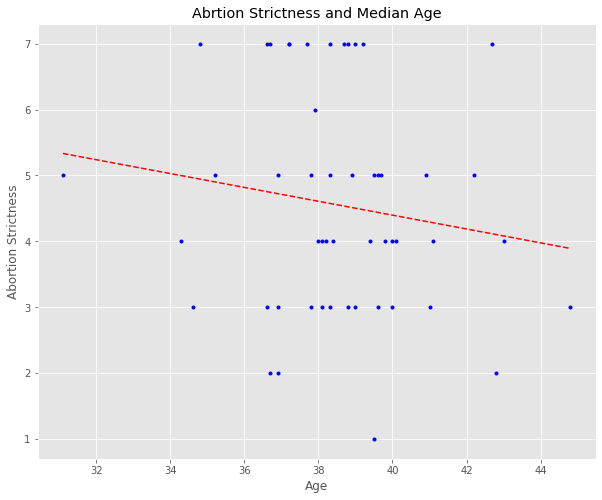

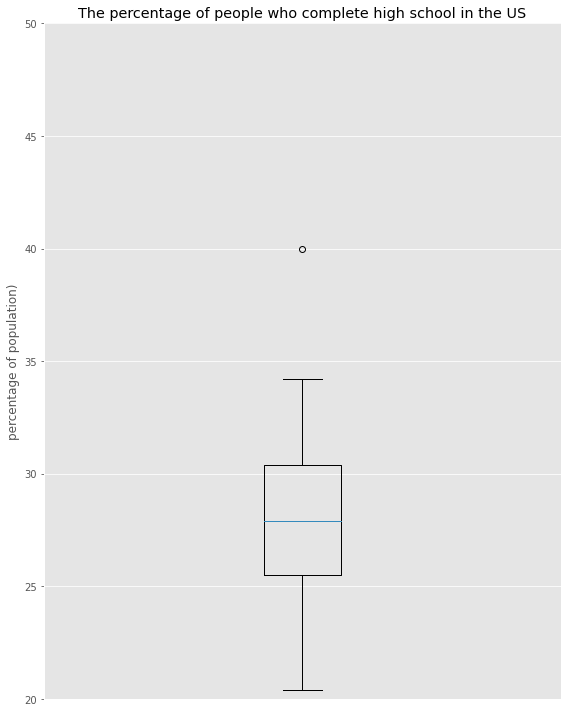

In [ ]:
#age

simple_regression(x_values = age, y_values = strictness, title ='Abrtion Strictness and Median Age', x_label = 'Age', y_label ='Abortion Strictness', save_fig ='age..png')
summary_Stats(age)
boxplot(value=high_school,title='The percentage of people who complete high school in the US', ylabel='percentage of population)',axis_max=50,axis_min=20)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                            
Dep. Variable:     Abortion strictness   R-squared:                       0.280
Model:                             OLS   Adj. R-squared:                  0.265
Method:                  Least Squares   F-statistic:                     19.06
Date:                 Wed, 21 Dec 2022   Prob (F-statistic):           6.55e-05
Time:                         02:36:48   Log-Likelihood:                -89.853
No. Observations:                   51   AIC:                             183.7
Df Residuals:                       49   BIC:                             187.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const           

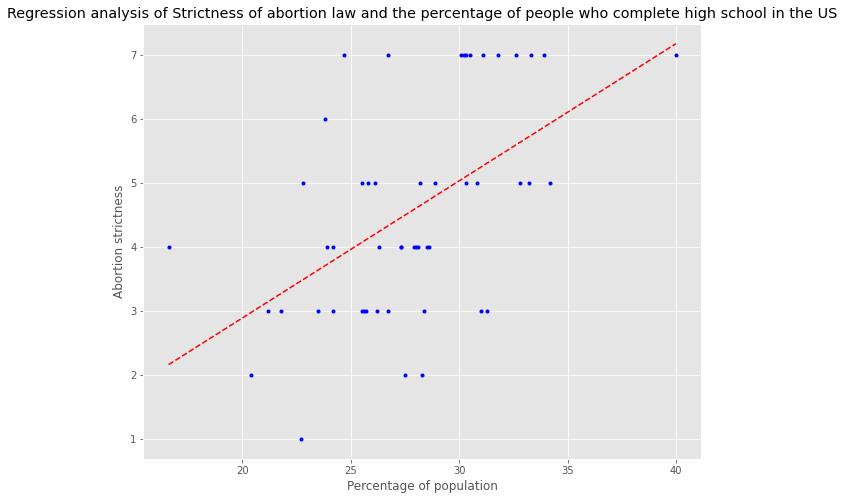

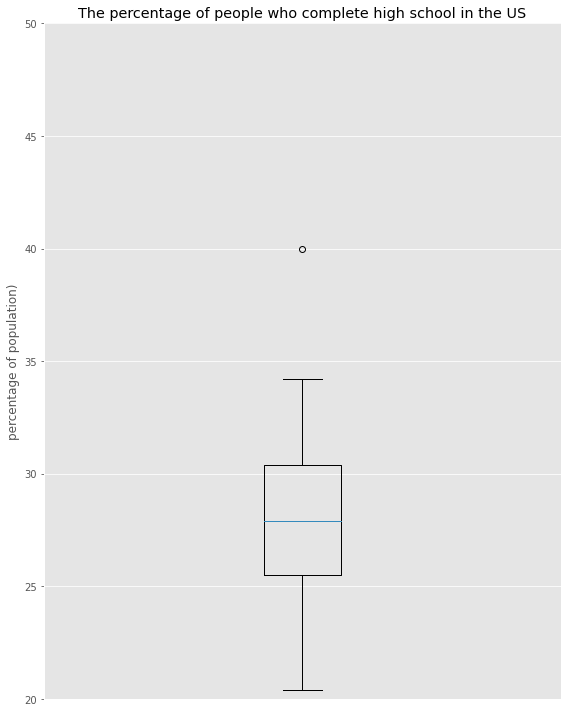

In [ ]:
#education level

#high school:
simple_regression(x_values = high_school ,y_values = strictness, title ='''Regression analysis of Strictness of abortion law and the percentage of people who complete high school in the US''',x_label='Percentage of population',y_label ='Abortion strictness', save_fig ="highschool.png")
table('0.21432008988369275','-1.394370649460917','0.2799967063848613','2.0663719975221193','6.54665586398712e-05')
summary_Stats(high_school)
boxplot(value=high_school,title='The percentage of people who complete high school in the US', ylabel='percentage of population)',axis_max=50,axis_min=20)


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                            
Dep. Variable:     Abortion strictness   R-squared:                       0.325
Model:                             OLS   Adj. R-squared:                  0.311
Method:                  Least Squares   F-statistic:                     23.57
Date:                 Wed, 21 Dec 2022   Prob (F-statistic):           1.27e-05
Time:                         02:36:52   Log-Likelihood:                -88.215
No. Observations:                   51   AIC:                             180.4
Df Residuals:                       49   BIC:                             184.3
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

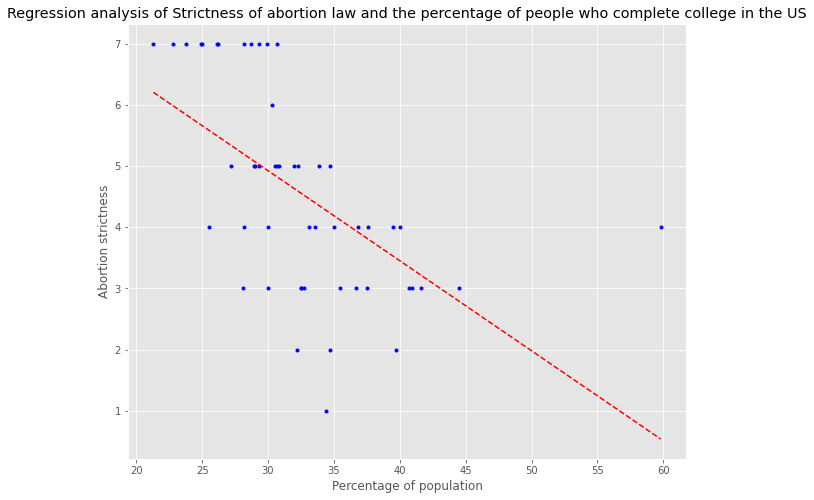

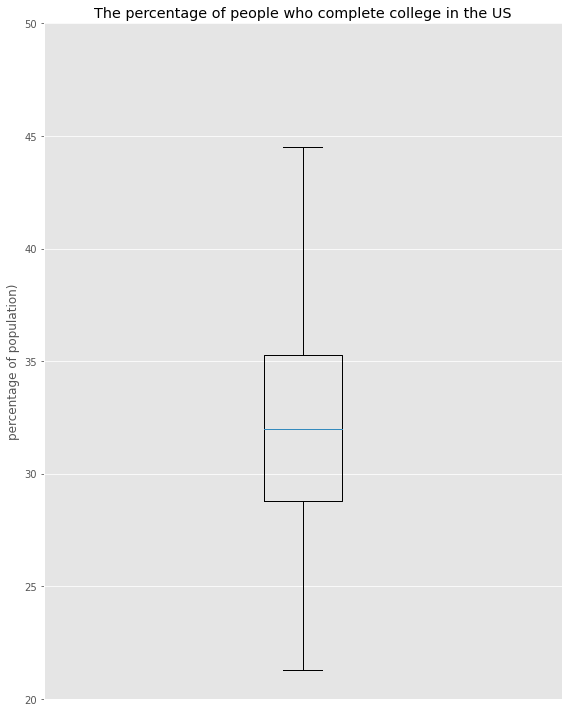

In [ ]:
#college:
simple_regression(x_values = college ,y_values = strictness, title ='''Regression analysis of Strictness of abortion law and the percentage of people who complete college in the US''',x_label='Percentage of population',y_label ='Abortion strictness', save_fig ="college.png")
table('-0.14722353462647586','9.340423975941661','0.32481551558959565','1.9377443466152142','1.2688887661271433e-05')
summary_Stats(college)
boxplot(value=college,title='The percentage of people who complete college in the US', ylabel='percentage of population)',axis_max=50,axis_min=20)



/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                             OLS Regression Results                            
Dep. Variable:     Abortion strictness   R-squared:                       0.372
Model:                             OLS   Adj. R-squared:                  0.359
Method:                  Least Squares   F-statistic:                     28.97
Date:                 Wed, 21 Dec 2022   Prob (F-statistic):           2.06e-06
Time:                         02:36:54   Log-Likelihood:                -86.386
No. Observations:                   51   AIC:                             176.8
Df Residuals:                       49   BIC:                             180.6
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

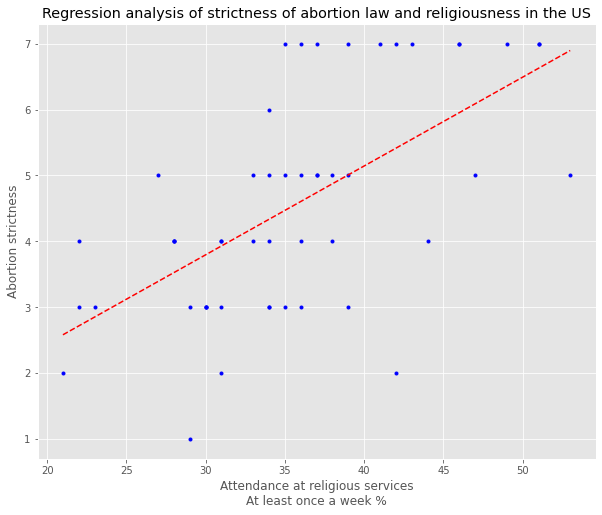

In [ ]:
#@title
#RELIGIOUSNESS

strictness = df['Abortion strictness']
religiousness =   df['Attendance at religious services\nAt least once a week %']
#typo, remember there are 2 spaces between Political and affiliation!

#REGRESSION

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# These lines extract the y-values and the x-values from the data:
x_values = religiousness
y_values = strictness 
# regression procedure:
X_values = sm.add_constant(x_values)
regression_model_a = sm.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

#Values we look for
gradient  = regression_model_b.params[1]
intercept = regression_model_b.params[0]
Rsquared  = regression_model_b.rsquared
MSE       = regression_model_b.mse_resid
pvalue    = regression_model_b.f_pvalue

# And print them:
print("gradient  =", regression_model_b.params[1])
print("intercept =", regression_model_b.params[0])
print("Rsquared  =", regression_model_b.rsquared)
print("MSE       =", regression_model_b.mse_resid)
print("pvalue    =", regression_model_b.f_pvalue)

# This line creates the endpoints of the best-fit line:
x_lobf = [min(x_values),max(x_values)]
y_lobf = [x_lobf[0]*gradient + intercept,x_lobf[1]*gradient + intercept]

# Uncomment these lines (remove the #) to set the axis limits (otherwise they will be set automatically):
#x_min,x_max = 0,5000000
#y_min,y_max = 0,5000000
#plt.xlim([x_min,x_max])
#plt.ylim([y_min,y_max])

# The next lines create and save the plot:
plt.plot(x_values,y_values,'b.',x_lobf,y_lobf,'r--')
plt.title('Regression analysis of strictness of abortion law and religiousness in the US')
plt.xlabel('Attendance at religious services\nAt least once a week %')
plt.ylabel('Abortion strictness')
plt.savefig("religiousness.png") #the filename you wish to save as:

In [ ]:
#@title
# TABLE
from prettytable import PrettyTable
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["gradient", "intercept", "R-squared", "MSE", "p-value"])
# Add rows
myTable.add_row(["0.13482318271119836", "-0.24909954158480674", "0.37153449290353135", "1.8036633120831826","2.0611774248573664e-06"])
print(myTable)

+---------------------+----------------------+---------------------+--------------------+------------------------+
|       gradient      |      intercept       |      R-squared      |        MSE         |        p-value         |
+---------------------+----------------------+---------------------+--------------------+------------------------+
| 0.13482318271119836 | -0.24909954158480674 | 0.37153449290353135 | 1.8036633120831826 | 2.0611774248573664e-06 |
+---------------------+----------------------+---------------------+--------------------+------------------------+


In [ ]:
#SUMMARY STATISTICS RELIGIOUSNESS
import numpy as np 
print(np.mean(religiousness)) 
print(np.median(religiousness)) 
print(np.std(religiousness))
print(np.var(religiousness))
min = print(np.min(religiousness))
max =print(np.max(religiousness)) 

min = 21
max = 53
range = max - min
print('Range is', range)

# First quartile (Q1)
Q1 = np.median(religiousness[:25])
print(Q1)
  
# Third quartile (Q3)
Q3 = np.median(religiousness[25:])
print(Q3)
  
# Interquartile range (IQR)
IQR = Q3 - Q1
  
print(IQR)

# TABLE
from prettytable import PrettyTable
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Mean", "Median", "SD", "Variance", "Min","Max","Range","Q1","Q3", "IQR" ])
# Add rows
myTable.add_row(["35.588235294117645", "35.0", "7.5073205334323845", "56.359861591695505","21","53","32","34.0", "36.0", "2.0" ])
print(myTable)


35.588235294117645
35.0
7.5073205334323845
56.359861591695505
21
53
Range is 32
34.0
36.0
2.0
+--------------------+--------+--------------------+--------------------+-----+-----+-------+------+------+-----+
|        Mean        | Median |         SD         |      Variance      | Min | Max | Range |  Q1  |  Q3  | IQR |
+--------------------+--------+--------------------+--------------------+-----+-----+-------+------+------+-----+
| 35.588235294117645 |  35.0  | 7.5073205334323845 | 56.359861591695505 |  21 |  53 |   32  | 34.0 | 36.0 | 2.0 |
+--------------------+--------+--------------------+--------------------+-----+-----+-------+------+------+-----+


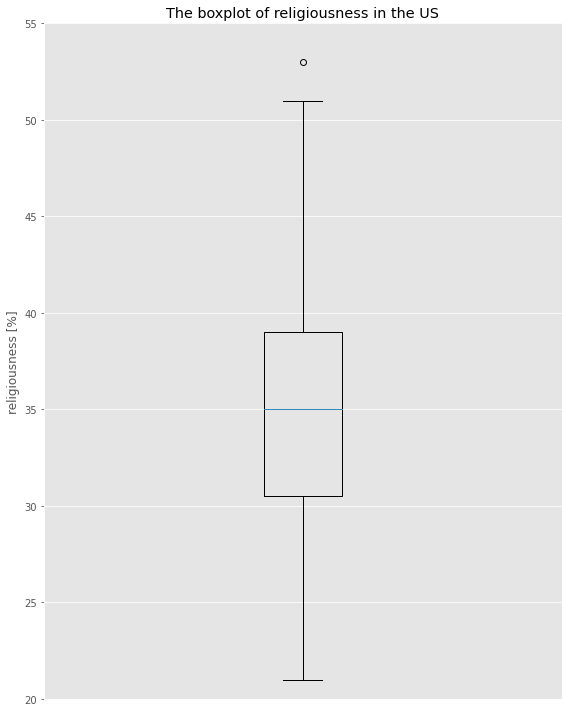

In [ ]:
#BOXPLOT RELIGIOUSNESS
# You can ignore these two lines:
import matplotlib.pyplot as plt
import numpy as np

data = np.array(religiousness)

# Use the next line to set figure height and width (experiment to check the scale):
figure_width, figure_height = 8,10

# This line creates the figure. 
fig = plt.figure(figsize=(figure_width,figure_height))

# Uncomment the next three lines to set the axis limits (otherwise they will be set automatically):
axis_min = 20
axis_max = 55
plt.ylim([axis_min,axis_max])

# These lines give the plot a title and an axis label:
plt.title("The boxplot of religiousness in the US")
plt.ylabel("religiousness [%]")

# The next lines create the plot and generally make it visually attractive:
plt.xlim([0.5,1.5])
# This is the line that actually produces the boxplot
plt.boxplot(data, vert = True)
plt.xticks([])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()